## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
# Simple data, with one variable (house area), and the label is the house price(K$).
data_frame = pd.read_csv('house_data.txt', names=['area', 'price'])

# Show the first ten samples of the data frame.
data_frame.head(10)

,area,price
0,50,25
1,50,23
2,50,30
3,50,20
4,55,27
5,55,25
6,60,27
7,60,28
8,60,24
9,65,28


## Prepare the data 

In [3]:
# Convert the data frame to a numpy array.
data = np.array(data_frame, dtype=np.float32)
rows, cols = data.shape

# Shuffle the data.
np.random.shuffle(data)

# Split the data into x data and y data, and convert them to numpy array.
x_data = data[:,0].reshape(rows, cols-1)
y_data = data[:,1].reshape(rows, 1)

# Add the ones column to x_data
ones = np.ones((rows, 1))
x_data = np.hstack((ones, x_data))

## Split the data, 70% for training and 30% for the test

In [4]:
# Separation index
idx = round(len(data) * 0.7)

# Split the x_data
x_train = x_data[:idx]
x_test = x_data[idx:]

# Split the y_data
y_train = y_data[:idx]
y_test = y_data[idx:]

## Plot the data

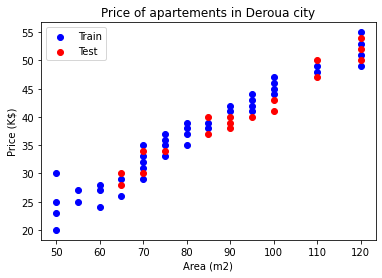

In [5]:
plt.scatter(x_train[:,1:], y_train, color='b', label='Train')
plt.scatter(x_test[:,1:], y_test, color='r', label='Test')
plt.xlabel('Area (m2)')
plt.ylabel('Price (K$)')
plt.title('Price of apartements in Deroua city')
plt.legend()
plt.show()

## Build the model

In [6]:
#Create the linear regression model
def lr_model(X, y, learning_rate, iterations):
    m = y.size
    theta = np.zeros((X.shape[1], 1))
    cost = []
    
    for i in range(iterations):
        h = np.dot(X, theta)
        J = (1 / (2 * m)) * np.sum((h - y) ** 2)
        
        d_theta = (1 / m) * np.dot(X.T, (h - y))
        theta = theta - learning_rate * d_theta
        cost.append(J)
    
    return theta, cost

In [7]:
Learning_rate = 0.0001
iterations = 7
theta, cost_fct = lr_model(x_train, y_train, Learning_rate, iterations)

## Plottiing the cost function

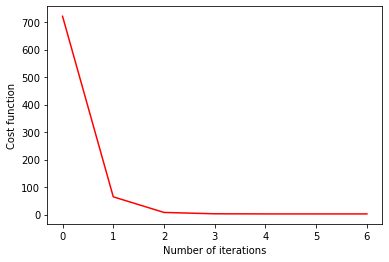

In [8]:
# Plotting the cost function
x_cost = np.arange(0, iterations)
plt.plot(x_cost, cost_fct, color='r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()

## Test the model

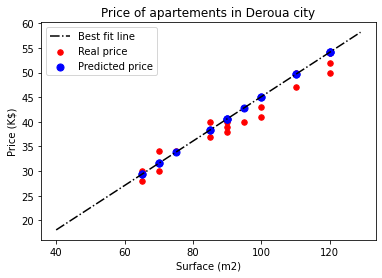

In [9]:
a = theta[1,0] # the slope (theta 0) 
b = theta[0,0] # Y-intercept (theta 1)

# Function to predict the price
def pred_price(x):
    return a * x + b

# Plot the best fit line, the predicted prices for the test data
area = np.arange(40, 130)
plt.plot(area, pred_price(area), 'k-.', label='Best fit line')
plt.scatter(x_test[:,1:], y_test, color='r', s=30, label='Real price')
plt.scatter(x_test[:,1:], pred_price(x_test[:,1:]), color='b', s=50, label='Predicted price')
plt.xlabel('Surface (m2)')
plt.ylabel('Price (K$)')
plt.title('Price of apartements in Deroua city')
plt.legend()
plt.show()

In [10]:
# Test for one value
area = 95
price = pred_price(area)
print(f'The price of a {area} m2 apartement is about {round(price, 2)} K$.')

The price of a 95 m2 apartement is about 42.86 K$.
